[View in Colaboratory](https://colab.research.google.com/github/avault/chicago_public_schools/blob/master/analysis_setup.ipynb)

# What do students want to know about the Chicago Public School system?

Questions students have about Chicago Public Schools (CPS), and an exploration of those questions.

[More information here, for the curious.](#More-Information)

## Click on a question to jump to it.

* [How does the food in CPS impact the students performance in school?](#How-does-the-food-in-CPS-impact-the-students-performance-in-school?)
* [Do the academic scores, such as in the NWEA or SAT, correlate with the behavior that the student presents in the academic environment?](#Do-the-academic-scores,-such-as-in-the-NWEA-or-SAT,-correlate-with-the-behavior-that-the-student-presents-in-the-academic-environment?)

In [1]:
## This piece of code loads in the data that was analyzed. Ignore it.

# Here we retrieve code we'll use for our analysis
import numpy as np
import pandas as pd
import analysis_helper

# Load the data
combined_df, hs_df = analysis_helper.load_data()

661 school profiles
661 school progress reports


## How does the food in CPS impact the students performance in school?

To approach this question, we tried to use [the Healthy CPS certification](https://www.cps.edu/oshw/Pages/HealthyCPSIndicator.aspx) as a measure of the food environment. However...

In [2]:
n_hs_certified = ( hs_df['Healthy_School_Certification'] == 'Achieved' ).sum()
print( '{} high schools have Healthy CPS certifications!'.format( n_hs_certified ) )

0 high schools have Healthy CPS certifications!


As you can see, **no high schools have the Healthy CPS certification**. So we stopped this line of exploration here.

##### Follow-up Questions:

* Why do no high schools have the healthy CPS certification?
* What schools *do* have the healthy CPS certification?
* Are there other measures of food certification?

## Do the academic scores, such as in the NWEA or SAT, correlate with the behavior that the student presents in the academic environment?

To approach this question we used the "Culture Climate Rating" as a measure of student behavior in the academic environment. 
We then compared the Culture Climate Rating with a measure of the school-wide performance on the NWEA math assessment.

The Culture Climate Rating is a score of the school's culture and climate based on the My Voice, My School 5Essentials survey. According to CPS: "For more information on this survey and additional measures of school culture and climate visit [cps.5-essentials.org](https://cps.5-essentials.org/2016)".

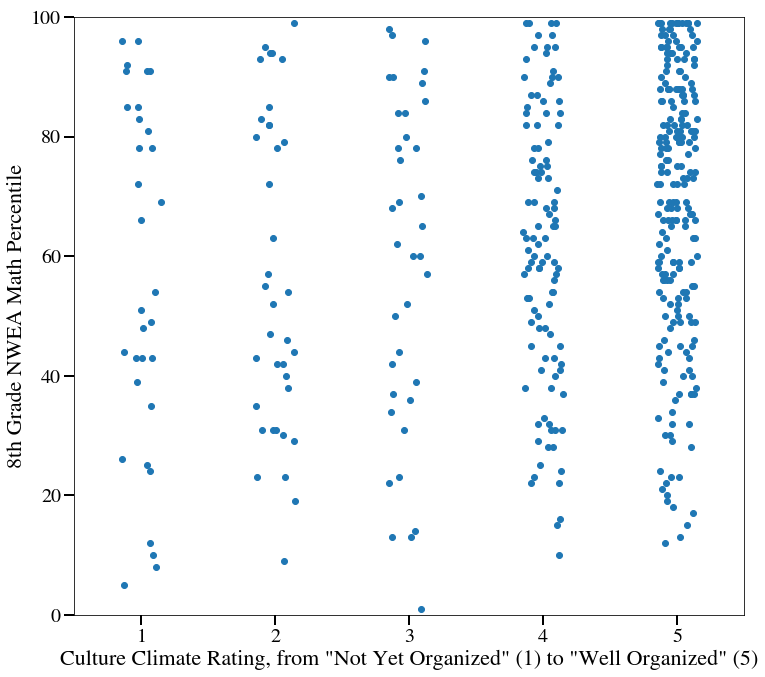

In [3]:
# This maps the qualitative assessment to a quantiative score
culture_climate_rating_mapping = {
    'NOT ENOUGH DATA': -1.,
    'NOT YET ORGANIZED': 1.,
    'PARTIALLY ORGANIZED': 2.,
    'MODERATELY ORGANIZED': 3.,
    'ORGANIZED': 4.,
    'WELL ORGANIZED': 5.,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Culture_Climate_Rating', 
    'NWEA_Math_Attainment_Grade_8_Pct',
    x_mapping = culture_climate_rating_mapping,
    x_label = 'Culture Climate Rating, from "Not Yet Organized" (1) to "Well Organized" (5)',
    y_label = '8th Grade NWEA Math Percentile',
    jitter = 0.15,
    x_lim = [ 0.5, 5.5 ],
    y_lim = [ 0, 100 ],
)

There doesn't appear to be a strong correlation between school culture and performance on the NWEA math exam. This *may* imply that school culture is not as important as other factors in exam performance. However, there may be some more subtle trends. 

##### Follow-up Questions:

* Can we do a more careful job of quantifying to what extent culture and standardized exams are correlated, beyond our estimate by eye?
* If culture really isn't important for exam performance, why would that be?

In [4]:
overall_rating_mapping = {
    'INCOMPLETE DATA': -1.,
    'EMERGING': 1.,
    'DEVELOPING': 2.,
    'STRONG': 3.,
    'EXCELLING': 4.,
}
overall_rating_int = []
for rating in combined_df['Creative_School_Certification']:
    overall_rating_int.append( overall_rating_mapping[rating] )
combined_df['Creative_School_Certification_Int'] = np.array( overall_rating_int )

In [5]:
overall_rating_mapping = {
    'INCOMPLETE DATA': -1.,
    'EMERGING': 1.,
    'DEVELOPING': 2.,
    'STRONG': 3.,
    'EXCELLING': 4.,
}
scatter_plot( combined_df, 'Creative_School_Certification_Int', 'NWEA_Math_Attainment_Grade_8_Pct' )

NameError: name 'scatter_plot' is not defined

# More Information

This page is the result of an exploration by students from the Northwestern Academy for Chicago Public Schools.
Over the course of three ~30 minute sessions (with ~10-15 students per session) students filtered through [the CPS 2016 school progress reports](https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/cp7s-7gxg) and came up with a list of things they wanted to know.
The students then worked together with vault admins to try and answer their questions during that time.
This webpage is the result.

A few things to note:
* Blocks of code are scattered throughout. These are the actual pieces of code used for the exploration, and are kept as an example, but are not the main point. [The full code is available here.](https://github.com/avault/chicago_public_schools)
* The raw plots and results were fully obtained within sessions themselves, but are presented here in a polished form.

This expedition was led by Zach Hafen.

[**Back to the top**](